Tutorial 4: Data and Models
===========================

Up to now, we've used used the `Aggregator` to load and inspect the `Result` and `Samples` of 3 model-fits.

In this tutorial, we'll look at how write Python generators which use the `Aggregator` to inspect, interpret and plot
the results of the model-fit, including fitting and plotting different models to our data.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autofit as af

/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autofit_workspace`


We begin by loading the database via the `.sqlite` file as we did in the previous tutorial. 

In [2]:
agg = af.Aggregator.from_database(
    path.join("output", "database_howtofit.sqlite"),
    completed_only=True
)

We'll reuse the `plot_line` function of previous tutorials, however it now displays to the notebook as opposed to
outputting the results to a .png file.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def plot_line(xvalues, line, title=None, ylabel=None, errors=None, color="k"):
    plt.errorbar(
        x=xvalues, y=line, yerr=errors, color=color, ecolor="k", elinewidth=1, capsize=2
    )
    plt.title(title)
    plt.xlabel("x value of profile")
    plt.ylabel(ylabel)
    plt.show()
    plt.clf()


We can use the `Aggregator` to load a generator of every fit`s data, by changing the `output` attribute to the 
`data` attribute at the end of the aggregator.

Note that in the `Analysis` class of tutorial 1, we specified that the `data` object would be saved to hard-disc using
the `save_attributes_for_aggregator` method, so that the `Aggregator` can load it.

In [4]:
data_gen = agg.values("data")
print("Datas:")
print(list(data_gen), "\n")

Datas:
[array([-4.35655429e-03,  4.15552994e-02,  5.58666974e-02,  2.12800803e-02,
        5.95799374e-02, -3.30097449e-03, -2.38261003e-02,  2.58341557e-02,
       -4.19961565e-02,  2.58750132e-02, -3.38404904e-02,  1.75870643e-02,
        2.97595736e-02,  1.91509384e-02, -1.07862819e-02, -7.53063598e-03,
        2.92375620e-02,  1.27373614e-03,  5.50775180e-02,  3.40139234e-02,
        2.64338779e-02,  1.28183116e-02, -2.28680207e-02, -2.78195623e-04,
       -7.26943033e-03, -6.85610438e-02, -1.33619663e-02,  2.15666386e-02,
       -6.22267174e-02, -3.72593648e-02,  1.18438644e-02, -6.73637939e-02,
       -4.79251727e-02,  7.00340925e-02, -3.12825562e-02,  5.74911554e-02,
        2.12480863e-02,  3.63154150e-02,  1.28657274e-01,  2.00367727e-01,
        2.62365707e-01,  3.24306756e-01,  5.22923333e-01,  7.85077696e-01,
        1.00025599e+00,  1.23782294e+00,  1.39202922e+00,  1.65125319e+00,
        1.83000187e+00,  2.00405632e+00,  1.97727960e+00,  1.91968588e+00,
        1.8653654

We can plot the `data` using the `plot_line` method.

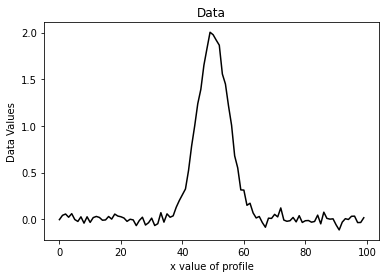

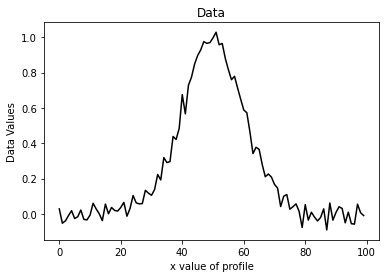

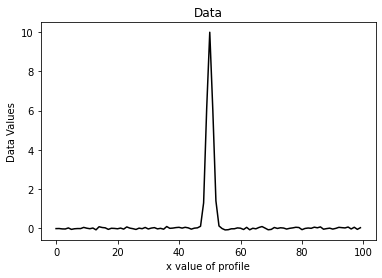

<Figure size 432x288 with 0 Axes>

In [5]:
for data in agg.values("data"):

    plot_line(
        xvalues=np.arange(data.shape[0]),
        line=data,
        title="Data",
        ylabel="Data Values",
        color="k",
    )

We can repeat the same trick to get the `noise_map` of every fit.

In [6]:
noise_map_gen = agg.values("noise_map")
print("Noise-Maps:")
print(list(noise_map_gen), "\n")

Noise-Maps:
[array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04]), array([0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
       0.04, 0.04, 0.04

The `info` dictionary we input into the `NonLinearSearch` is also available.

In [7]:
for info in agg.values("info"):
    print(info)

{'date_of_observation': '01-02-18', 'exposure_time': '1000.0'}
{'date_of_observation': '01-02-18', 'exposure_time': '1000.0'}
{'date_of_observation': '01-02-18', 'exposure_time': '1000.0'}


We're going to refit each dataset with the `max_log_likelihood_instance` of each model-fit and plot the residuals.

(If you are unsure what the `zip` is doing below, it essentially combines the `data_gen`, `noise_map_gen` and
`samples_gen` into one list such that we can iterate over them simultaneously).

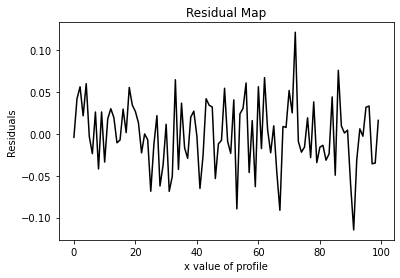

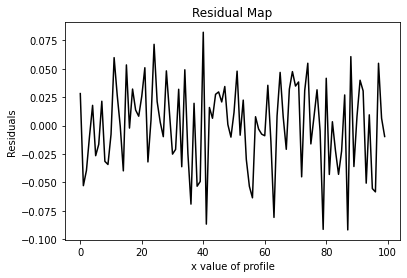

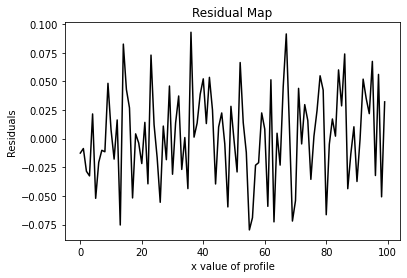

<Figure size 432x288 with 0 Axes>

In [8]:
samples_gen = agg.values("samples")
data_gen = agg.values("data")
noise_map_gen = agg.values("noise_map")

for data, noise_map, samples in zip(data_gen, noise_map_gen, samples_gen):

    instance = samples.max_log_likelihood_instance

    xvalues = np.arange(data.shape[0])

    model_data = sum(
        [profile.profile_from_xvalues(xvalues=xvalues) for profile in instance]
    )

    residual_map = data - model_data

    plot_line(
        xvalues=xvalues,
        line=residual_map,
        title="Residual Map",
        ylabel="Residuals",
        color="k",
    )

There is a problem with how we plotted the residuals above, can you guess what it is?

We used lists! If we had fit a large sample of data, the above object would store the data of all objects 
simultaneously in memory on our hard-disk, likely crashing our laptop! To avoid this, we must write functions that 
manipulate the `Aggregator` generators as generators themselves. Below is an example function that performs the same 
task as above.

In [9]:


def plot_residuals_from_agg_obj(agg_obj):

    data = agg_obj.data
    noise_map = agg_obj.noise_map
    samples = agg_obj.samples

    instance = samples.max_log_likelihood_instance

    xvalues = np.arange(data.shape[0])

    model_data = sum(
        [profile.profile_from_xvalues(xvalues=xvalues) for profile in instance]
    )

    residual_map = data - model_data

    plot_line(
        xvalues=xvalues,
        line=residual_map,
        title="Residual Map",
        ylabel="Residuals",
        color="k",
    )


To manipulate this function as a generator using the `Aggregator`, we apply it to the `Aggregator`'s `map` function.

In [10]:
pass
# plot_residuals_gen = agg.map(func=plot_residuals_from_agg_obj)

Lets get the `max_log_likelihood_instance`s, as we did in tutorial 3.

In [11]:
pass
# instances = [samps.max_log_likelihood_instance for samps in agg.values("samples")]

Okay, we want to inspect the fit of each `max_log_likelihood_instance`. To do this, we reperform each fit.

First, we need to create the `model_data` of every `max_log_likelihood_instance`. Lets begin by creating a list 
of profiles of every model-fit.